In [1]:
import os
import re
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/OscarG-DataSci/ADS-599B/main/Data%20Folder/elpac.csv')

In [44]:
df.head()

,AcademicYear,Stu_deID,School_deID,GradeLevel,DOB,TestAge,StudentGender,StudentEthnicity,Special_Education,Homeless,...,OverallLevel,ExpectedAttendanceDays,DaysAttended,AttendedPct,EnrolledPct,GradeEnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity
0,2017-2018,0,3,1,2011-07-04,6.828340,F,Hispanic,N,Y,...,4,180.0,175.0,0.972222,1.0,1.999999,1.972222,F,4,Hispanic
1,2017-2018,1,5,4,2008-07-28,9.631957,M,Hispanic,N,N,...,3,180.0,168.0,0.933333,1.0,4.999999,4.933333,F,2,Multiple
2,2017-2018,3,3,4,2008-05-06,9.905748,M,Hispanic,Y,N,...,2,180.0,175.0,0.972222,1.0,4.999999,4.972222,F,18,White
3,2017-2018,4,3,0,2012-04-13,6.108271,M,Hispanic,N,N,...,4,180.0,125.0,0.694444,1.0,0.999999,0.694444,F,1,White
4,2017-2018,5,7,0,2011-09-25,6.664066,M,Hispanic,N,N,...,1,180.0,165.0,0.916667,1.0,0.999999,0.916667,F,17,Hispanic


In [45]:
print(df.shape, df.dtypes)

(11628, 24) AcademicYear                   object
Stu_deID                        int64
School_deID                     int64
GradeLevel                      int64
DOB                            object
TestAge                       float64
StudentGender                  object
StudentEthnicity               object
Special_Education              object
Homeless                       object
SocioEconomically              object
TestDayName                    object
TestDate                       object
OverallScore                    int64
OverallLevel                    int64
ExpectedAttendanceDays        float64
DaysAttended                  float64
AttendedPct                   float64
EnrolledPct                   float64
GradeEnrolledPct              float64
GradeAttendedPct              float64
TeacherGender                  object
TeacherTotalYearsOfService      int64
TeacherEthnicity               object
dtype: object


In [46]:
print(df.columns)

Index(['AcademicYear', 'Stu_deID', 'School_deID', 'GradeLevel', 'DOB',
       'TestAge', 'StudentGender', 'StudentEthnicity', 'Special_Education',
       'Homeless', 'SocioEconomically', 'TestDayName', 'TestDate',
       'OverallScore', 'OverallLevel', 'ExpectedAttendanceDays',
       'DaysAttended', 'AttendedPct', 'EnrolledPct', 'GradeEnrolledPct',
       'GradeAttendedPct', 'TeacherGender', 'TeacherTotalYearsOfService',
       'TeacherEthnicity'],
      dtype='object')


#####**CHECK DUPLICATED RECORDS**

In [47]:
print(df.duplicated().sum())

0


#####**DISTRIBUTIONS OF EACH COLUMN**

In [48]:
# print(df.value_counts())
print(df.OverallLevel.value_counts())

3    3432
2    2782
0    2166
1    1687
4    1561
Name: OverallLevel, dtype: int64


#####**ADD STUDENT'S AGE COLUMN CONVERTING FROM DOB**

In [49]:
from datetime import date

def calculate_age(born):
    today = date.today()
    try: 
        birthday = born.replace(year=today.year)
    except ValueError: # raised when birth date is February 29 and the current year is not a leap year
        birthday = born.replace(month=born.month+1, day=1, year=today.year)
    if birthday > today:
        return today.year - born.year - 1
    else:
        return today.year - born.year

In [50]:
#change DOB into year-month-date format and save under 'format_DOB'
df['format_DOB'] =  pd.to_datetime(df['DOB'], format='%Y-%m-%d')

In [51]:
#apply on DOB column
df['age'] = df['format_DOB'].apply(calculate_age)

In [52]:
df.head(5)

,AcademicYear,Stu_deID,School_deID,GradeLevel,DOB,TestAge,StudentGender,StudentEthnicity,Special_Education,Homeless,...,DaysAttended,AttendedPct,EnrolledPct,GradeEnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,format_DOB,age
0,2017-2018,0,3,1,2011-07-04,6.828340,F,Hispanic,N,Y,...,175.0,0.972222,1.0,1.999999,1.972222,F,4,Hispanic,2011-07-04,11
1,2017-2018,1,5,4,2008-07-28,9.631957,M,Hispanic,N,N,...,168.0,0.933333,1.0,4.999999,4.933333,F,2,Multiple,2008-07-28,14
2,2017-2018,3,3,4,2008-05-06,9.905748,M,Hispanic,Y,N,...,175.0,0.972222,1.0,4.999999,4.972222,F,18,White,2008-05-06,14
3,2017-2018,4,3,0,2012-04-13,6.108271,M,Hispanic,N,N,...,125.0,0.694444,1.0,0.999999,0.694444,F,1,White,2012-04-13,10
4,2017-2018,5,7,0,2011-09-25,6.664066,M,Hispanic,N,N,...,165.0,0.916667,1.0,0.999999,0.916667,F,17,Hispanic,2011-09-25,11


In [53]:
df.isna().sum()

AcademicYear                     0
Stu_deID                         0
School_deID                      0
GradeLevel                       0
DOB                              0
TestAge                       2159
StudentGender                    0
StudentEthnicity                 0
Special_Education                0
Homeless                         0
SocioEconomically                0
TestDayName                   2159
TestDate                      2159
OverallScore                     0
OverallLevel                     0
ExpectedAttendanceDays           0
DaysAttended                     0
AttendedPct                      3
EnrolledPct                      0
GradeEnrolledPct                 0
GradeAttendedPct                 3
TeacherGender                    0
TeacherTotalYearsOfService       0
TeacherEthnicity                 0
format_DOB                       0
age                              0
dtype: int64

In [54]:
#drop the missing values
df = df.dropna()

In [55]:
df.isna().sum()

AcademicYear                  0
Stu_deID                      0
School_deID                   0
GradeLevel                    0
DOB                           0
TestAge                       0
StudentGender                 0
StudentEthnicity              0
Special_Education             0
Homeless                      0
SocioEconomically             0
TestDayName                   0
TestDate                      0
OverallScore                  0
OverallLevel                  0
ExpectedAttendanceDays        0
DaysAttended                  0
AttendedPct                   0
EnrolledPct                   0
GradeEnrolledPct              0
GradeAttendedPct              0
TeacherGender                 0
TeacherTotalYearsOfService    0
TeacherEthnicity              0
format_DOB                    0
age                           0
dtype: int64

In [56]:
# omit records where scores are zero
df = df.query("OverallScore != 0")

In [57]:
df.groupby('GradeLevel').agg({'OverallScore': ['min', 'max']})


OverallScore      
                    min   max
GradeLevel                   
0                  1150  1700
1                  1150  1627
2                  1150  1700
3                  1150  1672
4                  1150  1731
5                  1150  1731
6                  1150  1729

In [58]:
# to Standardize OverallScore values, as the ranges are different between grade levels
grdLevel_describe = []

for g in range(len(pd.DataFrame(df.GradeLevel.unique()))):

    grdLevel_describe.append({'GradeLevel': g,
                             'OverallScoreMin': pd.DataFrame(df.query("GradeLevel == @g").OverallScore.describe().to_list()).iloc[3].values[0],
                             'OverallScoreMax': pd.DataFrame(df.query("GradeLevel == @g").OverallScore.describe().to_list()).iloc[7].values[0]})   

pd.DataFrame(grdLevel_describe) 

,GradeLevel,OverallScoreMin,OverallScoreMax
0,0,1150.0,1700.0
1,1,1150.0,1627.0
2,2,1150.0,1700.0
3,3,1150.0,1672.0
4,4,1150.0,1731.0
5,5,1150.0,1731.0
6,6,1150.0,1729.0


In [59]:
# Bring in min and max columns to df dataframe
df = df.merge(pd.DataFrame(grdLevel_describe) , left_on=('GradeLevel'), right_on=('GradeLevel'))

In [60]:
# Standardize Overall Score
df['OverallScoreStd'] = (df.OverallScore - df.OverallScoreMin) / (df.OverallScoreMax - df.OverallScoreMin)

In [61]:
df = df.drop(columns = ['OverallScoreMin', 'OverallScoreMax','OverallScore'])
df.head()

,AcademicYear,Stu_deID,School_deID,GradeLevel,DOB,TestAge,StudentGender,StudentEthnicity,Special_Education,Homeless,...,AttendedPct,EnrolledPct,GradeEnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,format_DOB,age,OverallScoreStd
0,2017-2018,0,3,1,2011-07-04,6.828340,F,Hispanic,N,Y,...,0.972222,1.0,1.999999,1.972222,F,4,Hispanic,2011-07-04,11,0.740042
1,2017-2018,11,3,1,2010-12-06,7.416990,F,Hispanic,N,N,...,0.861111,1.0,1.999999,1.861111,F,3,White,2010-12-06,11,0.666667
2,2017-2018,15,9,1,2010-10-20,7.507341,M,Hispanic,Y,N,...,0.972222,1.0,1.999999,1.972222,F,1,Hispanic,2010-10-20,12,0.658281
3,2017-2018,20,7,1,2011-05-26,6.998090,M,Hispanic,N,N,...,0.833333,1.0,1.999999,1.833333,F,8,Hispanic,2011-05-26,11,0.584906
4,2017-2018,24,3,1,2010-09-14,7.688043,M,Hispanic,N,N,...,0.761111,1.0,1.999999,1.761111,F,4,Hispanic,2010-09-14,12,0.616352


##**DATA VISUALIZATION**

####**DISTRIBUTION PLOTS OF CATEGORICAL VARIABLES**

In [62]:
#Split numerical and categorical dataframes for visualization purpose

#for num_df, only extract the useful columns and drop the columns such as 'Stu_deID'

num_df = df[['School_deID','GradeLevel','TestAge','OverallLevel','ExpectedAttendanceDays','DaysAttended',
           'AttendedPct', 'EnrolledPct' ,'GradeEnrolledPct', 'GradeAttendedPct','TeacherTotalYearsOfService','format_DOB','age',
           'OverallScoreStd']]

#for cat_df, keep only the suitable features for visualization 
cat_df = df[['AcademicYear','StudentGender','StudentEthnicity','Special_Education','Homeless','SocioEconomically','TestDayName',
           'TeacherGender','TeacherEthnicity']]

In [63]:
num_df.head()

,School_deID,GradeLevel,TestAge,OverallLevel,ExpectedAttendanceDays,DaysAttended,AttendedPct,EnrolledPct,GradeEnrolledPct,GradeAttendedPct,TeacherTotalYearsOfService,format_DOB,age,OverallScoreStd
0,3,1,6.828340,4,180.0,175.0,0.972222,1.0,1.999999,1.972222,4,2011-07-04,11,0.740042
1,3,1,7.416990,4,180.0,155.0,0.861111,1.0,1.999999,1.861111,3,2010-12-06,11,0.666667
2,9,1,7.507341,3,180.0,175.0,0.972222,1.0,1.999999,1.972222,1,2010-10-20,12,0.658281
3,7,1,6.998090,2,180.0,150.0,0.833333,1.0,1.999999,1.833333,8,2011-05-26,11,0.584906
4,3,1,7.688043,3,180.0,137.0,0.761111,1.0,1.999999,1.761111,4,2010-09-14,12,0.616352


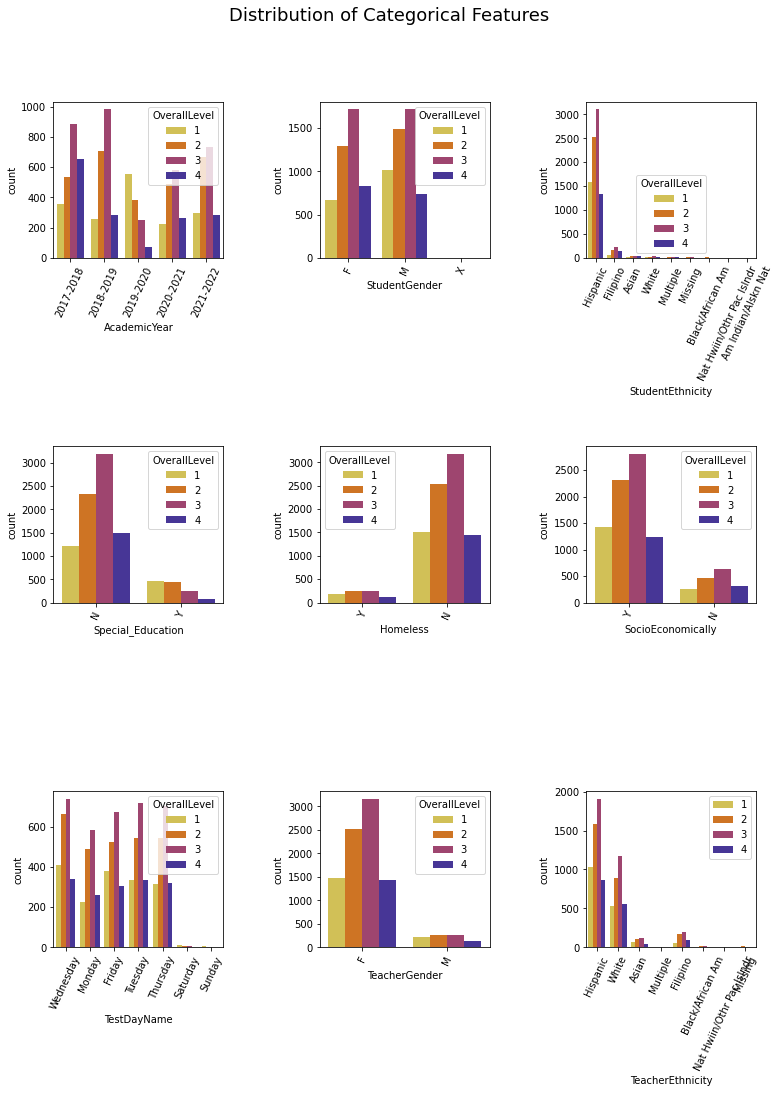

In [64]:

fig , ax = plt.subplots(3,3, figsize = (12,16))     # set up 2 x 2 frame count plot with figsize 10 x 10
fig.suptitle("Distribution of Categorical Features", fontsize=18)

for i , subplots in zip (cat_df, ax.flatten()):
  g = sns.countplot(cat_df[i],hue = df['OverallLevel'],ax = subplots, palette = 'CMRmap_r')
  g.set_xticklabels(labels=cat_df[i].unique(), rotation= 65)


fig.tight_layout(pad= 5.0)
plt.legend(loc = 'upper right')
plt.show()

####**From the categorical distribution plots, it's noted that**

1.  Similar counts between academic_year, student's gender (except X unique value). 

2.  Less counts of students with required special education, homeless, non-socioeconomically. 

3.  Majority of students are Hispanic. 

4.  Majority of test days are from Monday through Friday.  

5.  Most teachers are females.  Most teachers are Hispanic. 

6.  Unique value X in 'StudentGender' will be replaced with the mode. 

7. Students in special education scores fell in levels 1 and 2

####**DISTRIBUTION PLOTS OF NUMERICAL VARIABLES**

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


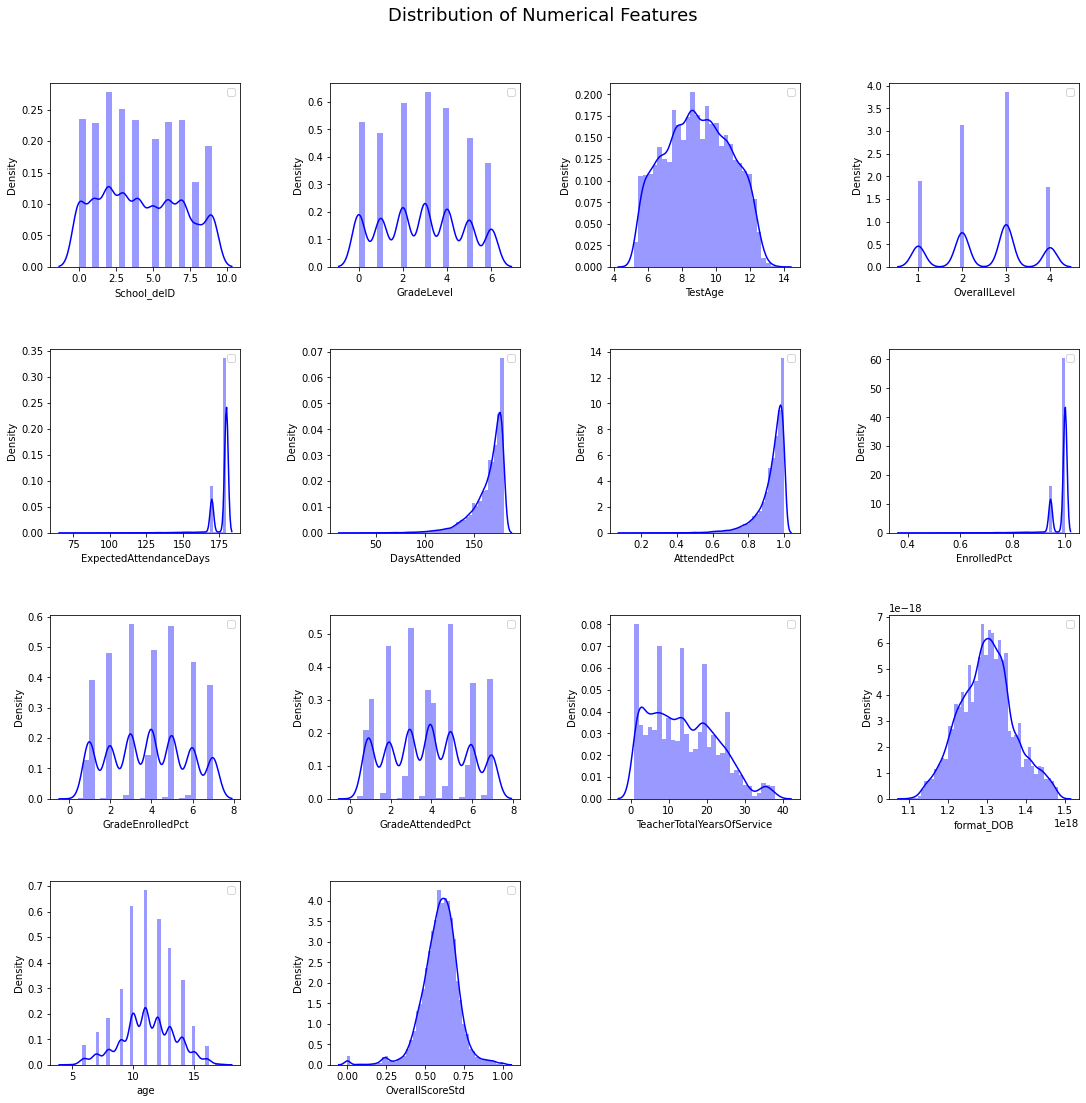

In [84]:
fig , ax = plt.subplots(3,3, figsize = (16,16))     
fig.suptitle("Distribution of Numerical Features", fontsize=18)

for i, column in enumerate(num_df, 1):
    plt.subplot(4, 4, i)
    sns.distplot(x=num_df[column], color = 'blue') 
    plt.legend() 
    plt.xlabel(column)
    fig.tight_layout(pad=4.0)

####**From the numerical histograms, it's noted that**

1. Normal distributions are observed for TestAge and age

2.  OverallScore, ExpectedAttendanceDays, DaysAttended, AttendedPct, EnrolledPct are left skewed meaning most student's attendance are higher. 

3.  TeacherTotalYearsofService are slighly right skewed meaning junior level teachers outweigh the experienced senior teachers.   

3.  Zero values in 'OverallScore'. 



####**CORRELATION PLOT**

<AxesSubplot:>

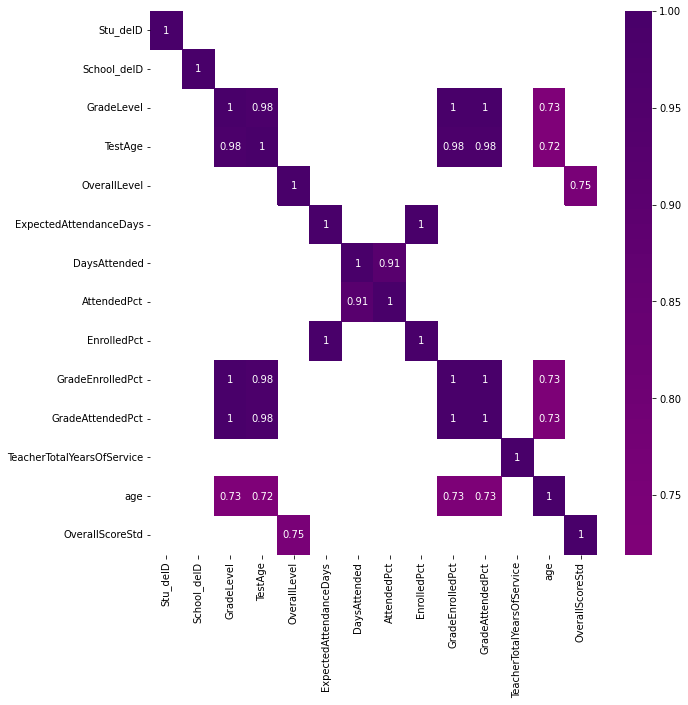

In [85]:
corr = df.corr()
kot = corr[corr>=.7]  #filter correlation pairs higher than 0.9
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(kot, annot=True, cmap="RdPu", center=0, ax=ax)

####**Highly correlated features are**



1.   GradeLevel & TestAge
2.   OverallScore & OverallLevel
3.   GradeEnrolledPct & GradeAttendedPct
4.   DaysAttended & AttendedPct





###**DISTRIBUTION OF TARGET CLASSES: OVERALL LEVEL**

<AxesSubplot:xlabel='OverallLevel', ylabel='count'>

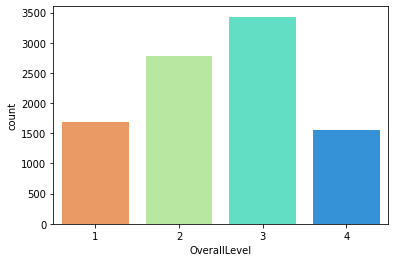

In [86]:
fig_szie=(12,8)
sns.countplot(df['OverallLevel'], data = df, palette = 'rainbow_r')

###A slight class-imbalance was observed among the scores.  

1.  Downsampling will be performed for level 2 and 3 as reference to level 4 count. 

2. Balanced dataset will be trained with models to see the accuracy performance. 

In [87]:
#downsamples level 2 and 3 as reference to level 4

lev_0 = df[df['OverallLevel'] == 0]
lev_1 = df[df['OverallLevel'] == 1]
lev_2 = df[df['OverallLevel'] == 2]
lev_3 = df[df['OverallLevel'] == 3]
lev_4 = df[df['OverallLevel'] == 4]


In [88]:
from sklearn.utils import resample

lev1_upsample = resample(lev_1,replace=True,n_samples=len(lev_3),random_state=42)
lev2_upsample = resample(lev_2,replace=True,n_samples=len(lev_3),random_state=42)
lev4_upsample = resample(lev_4,replace=True,n_samples=len(lev_3),random_state=42)


In [89]:
#create a new dataframe with balanced datasets

frames = (lev1_upsample, lev2_upsample, lev_3, lev4_upsample)
df1 = pd.concat(frames)
df1.shape

(13724, 26)

<AxesSubplot:xlabel='OverallLevel', ylabel='count'>

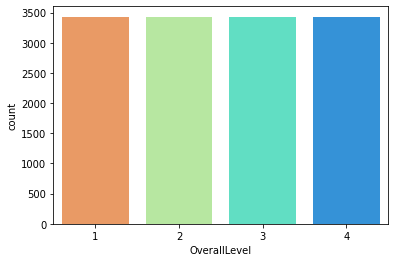

In [90]:
fig_szie=(12,8)
sns.countplot(df1['OverallLevel'], data = df1, palette = 'rainbow_r')

###**According to the data visualization plots, here are the steps for feature engineering.**

1.  GradeEnrolledPct, AttendedPct will be dropped from the data frame to avoid multicollinearity. 

2.  TestAge is the student's age on the date of the ELPAC test. For example, for record #1, the student was born on 7/4/2011 and student is 11 year old. TestAge of the student is 6.828340. Since GradeLevel and TestAge are highly correlated and age column was also populated, it's safe to drop the TestAge to avoid multicollinearity.  

3.  OverallScore will also be dropped since it wil be unknown in classifying/predicting the ELPAC scores in the real life application.

4.  Other insignificant columns such as 'AcademicYear', 'Stu_deID', 'DOB', 'format_DOB', 'TestDate' will also be dropped. 

5.  Dataset will be split into Train and test dataset. 

6.  Unique value X in 'StudentGender', Nan in 'TestDayName' will be replaced with the mode of each feature column for each train and test data set to avoid data leakage. 

7.  Label-encoding will be performed for categorical variables. 


In [72]:
new_df = df1.drop(columns = ['AcademicYear','Stu_deID','DOB','TestAge','GradeEnrolledPct',
                             'AttendedPct','format_DOB','TestDate'])

In [91]:
new_df.head()

,School_deID,GradeLevel,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,OverallLevel,ExpectedAttendanceDays,DaysAttended,EnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,age,OverallScoreStd
6512,7,3,F,Hispanic,N,N,N,Wednesday,1,180.0,179.0,1.000000,3.994444,F,4,Asian,12,0.494253
7808,1,6,M,Hispanic,N,N,Y,Wednesday,1,180.0,178.0,1.000000,6.988889,F,7,Asian,14,0.516408
5477,7,2,M,Hispanic,N,N,Y,Friday,1,170.0,160.0,0.944444,2.941176,F,26,Hispanic,8,0.494545
7389,2,6,M,Hispanic,Y,N,Y,Tuesday,1,180.0,172.0,1.000000,6.955556,F,17,Hispanic,16,0.550950
6517,7,3,M,Hispanic,N,N,Y,Wednesday,1,180.0,177.0,1.000000,3.983333,F,4,Asian,11,0.563218


###**DATA PARTITIONING**
####**Split dataset into 70% train and 30% test datasets.**

In [92]:
from sklearn.model_selection import train_test_split

Xa = new_df.loc[ : , new_df.columns != 'OverallLevel']
ya = new_df[['OverallLevel']]

Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,ya,random_state=700, test_size=0.30)
print(Xa_train.shape, ya_train.shape, Xa_test.shape, ya_test.shape)

(9606, 17) (9606, 1) (4118, 17) (4118, 1)


In [94]:
##replace X value from StudentGender with Mode value for StudentGender column
print(Xa_train['StudentGender'].mode())
Xa_train['StudentGender'] = Xa_train['StudentGender'].replace(to_replace = 'M', value = 'X') #replace X value with mode

print(Xa_test['StudentGender'].mode())
Xa_test['StudentGender'] = Xa_test['StudentGender'].replace(to_replace = 'M', value = 'X') #replace X value with mode

0    X
dtype: object
0    X
dtype: object


In [95]:
#replace missing values from TestDayName column with mode value
Xa_train['TestDayName'] = Xa_train['TestDayName'].fillna(Xa_train['TestDayName'].mode()[0])
Xa_test['TestDayName'] = Xa_test['TestDayName'].fillna(Xa_test['TestDayName'].mode()[0])

In [96]:
#replace missing values from GradeAttendedPact with mean values
Xa_train['GradeAttendedPct'] = Xa_train['GradeAttendedPct'].fillna(Xa_train['GradeAttendedPct'].mean())
Xa_test['GradeAttendedPct'] = Xa_test['GradeAttendedPct'].fillna(Xa_test['GradeAttendedPct'].mean())

####**LABEL-ENCODING FOR CATEGORICAL VARIABLES**

In [97]:
cat_columns = ['StudentGender','StudentEthnicity','Special_Education','Homeless','SocioEconomically',
               'TestDayName','TeacherGender','TeacherEthnicity']

In [98]:
from sklearn.preprocessing import LabelEncoder

#Train dataset
train_label_encoders = {}
for column in cat_columns:
  train_label_encoders[column] = LabelEncoder()
  Xa_train[column] = train_label_encoders[column].fit_transform(Xa_train[column])

#Test dataset
test_label_encoders = {}
for column in cat_columns:
  test_label_encoders[column] = LabelEncoder()
  Xa_test[column] = test_label_encoders[column].fit_transform(Xa_test[column])


In [99]:
Xa_train.head(2)

,School_deID,GradeLevel,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,ExpectedAttendanceDays,DaysAttended,EnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,age,OverallScoreStd
3739,2,0,0,4,0,0,1,4,180.0,178.0,1.000000,0.988889,0,7,7,9,0.507273
9280,2,5,0,4,0,1,1,4,170.0,134.0,0.944444,5.788235,0,19,2,11,0.807229


In [100]:
Xa_test.head(2)

,School_deID,GradeLevel,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,ExpectedAttendanceDays,DaysAttended,EnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,age,OverallScoreStd
8029,7,6,0,3,0,0,1,0,180.0,168.0,1.000000,6.933333,1,10,3,13,0.659758
7137,6,3,1,3,0,1,1,4,170.0,130.0,0.944444,3.764706,0,22,3,10,0.547893


###**Now the train and test dataset are ready for modelings.**